In [ ]:
import pandas as pd
import os

# Loading data
# Define the path to the data folder
base_path = r'C:\Users\PC\Desktop\LIDA task\crime_data\data'

# List of month folders
months = ['2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09']

# Initialise an empty DataFrame to concatenate all monthly data
crime_data = pd.DataFrame()

In [ ]:
# Combined data
# Loop through each month and read Excel file
for month in months:
    file_name = f'{month}-west-yorkshire-street.csv'
    file_path = os.path.join(base_path, month, file_name)
    
    # Load data into DataFrame
    df = pd.read_csv(file_path)
    
    # Add a new column to identify the month
    df['Month'] = month
    
    # Concatenate monthly data
    crime_data = pd.concat([crime_data, df], ignore_index=True)

In [ ]:
# Inspect the first few rows
print(crime_data.head())

In [ ]:
# Check general information about the data
print(crime_data.info())

In [ ]:
# Check for missing values
print(crime_data.isnull().sum())

In [ ]:
# Check basic statistics for numerical or categorical data
print(crime_data.describe(include='all'))

In [ ]:
# Data cleaning and preprocessing

# Drop Irrelevant Columns (fully missing or constant values)

crime_data_cleaned = crime_data.drop(columns=['Unnamed: 0', 'Context', 'Reported by', 'Falls within'])
print("Columns after dropping irrelevant ones:", crime_data_cleaned.columns.tolist())

In [ ]:
# Remove Rows with Missing Crime type (essential for analysis)

crime_data_cleaned = crime_data_cleaned.dropna(subset=['Crime type'])
print(f"Remaining rows after dropping missing Crime type: {len(crime_data_cleaned)}")

In [ ]:
# Filter Unrealistic Geographic Coordinates (outside West Yorkshire)

crime_data_cleaned = crime_data_cleaned[
    crime_data_cleaned['Longitude'].between(-2.5, -1.0) &
    crime_data_cleaned['Latitude'].between(53.0, 54.0)
]
print(f"Rows remaining after geographic filtering: {len(crime_data_cleaned)}")

In [19]:
# Remove Duplicate Rows to Prevent Overcounting

crime_data_cleaned = crime_data_cleaned.drop_duplicates(
    subset=['Crime ID', 'Longitude', 'Latitude', 'Month']
)
print(f"Rows after removing duplicates: {len(crime_data_cleaned)}")

Rows after removing duplicates: 145258


In [21]:
# Standardise Text Columns (Crime type & Last outcome category)

# Standardise Crime type
crime_data_cleaned['Crime type'] = (
    crime_data_cleaned['Crime type']
    .astype(str).str.strip().str.title()
)

# Show unique values for Crime type (should now be title-cased)
print("\nUnique Crime types:")
print(crime_data_cleaned['Crime type'].unique())



Unique Crime types:
['Anti-Social Behaviour' 'Burglary' 'Shoplifting'
 'Violence And Sexual Offences' 'Drugs' 'Other Theft'
 'Possession Of Weapons' 'Public Order' 'Vehicle Crime' 'Robbery'
 'Other Crime' 'Criminal Damage And Arson' 'Bicycle Theft'
 'Theft From The Person' 'Exclusive']


In [23]:
crime_data_cleaned[crime_data_cleaned['Crime type'] == 'Exclusive'].shape[0]

110

In [25]:
official_crime_types = [
    'Anti-Social Behaviour', 'Bicycle Theft', 'Burglary',
    'Criminal Damage And Arson', 'Drugs', 'Other Crime',
    'Other Theft', 'Possession Of Weapons', 'Public Order',
    'Robbery', 'Shoplifting', 'Theft From The Person',
    'Vehicle Crime', 'Violence And Sexual Offences'
]

crime_data_cleaned = crime_data_cleaned[
    crime_data_cleaned['Crime type'].isin(official_crime_types)
]

In [27]:
# Show number of remaining rows
print(f"Rows after filtering for official crime types: {len(crime_data_cleaned)}")

# Optional: Show the unique Crime Types (should only list the 14)
print("\nRemaining unique crime types:")
print(sorted(crime_data_cleaned['Crime type'].unique()))


Rows after filtering for official crime types: 145148

Remaining unique crime types:
['Anti-Social Behaviour', 'Bicycle Theft', 'Burglary', 'Criminal Damage And Arson', 'Drugs', 'Other Crime', 'Other Theft', 'Possession Of Weapons', 'Public Order', 'Robbery', 'Shoplifting', 'Theft From The Person', 'Vehicle Crime', 'Violence And Sexual Offences']


In [29]:
print("Before filtering:", crime_data_cleaned.shape[0])
crime_data_cleaned = crime_data_cleaned[
    crime_data_cleaned['Crime type'].isin(official_crime_types)
]
print("After filtering:", crime_data_cleaned.shape[0])


Before filtering: 145148
After filtering: 145148


In [31]:
# Standardise Last outcome category and handle missing
crime_data_cleaned['Last outcome category'] = (
    crime_data_cleaned['Last outcome category']
    .fillna('Outcome Unknown')
    .str.strip().str.title()
)

# Show value counts for Last outcome category
print("\nTop 5 Last outcome categories:")
print(crime_data_cleaned['Last outcome category'].value_counts().head())


Top 5 Last outcome categories:
Last outcome category
Unable To Prosecute Suspect                      62176
Investigation Complete; No Suspect Identified    42286
Outcome Unknown                                  20962
Court Result Unavailable                         10151
Status Update Unavailable                         3388
Name: count, dtype: int64


In [33]:
# Convert Month Column to Ordered Categorical

expected_months = ['2020-04','2020-05','2020-06','2020-07','2020-08','2020-09']
crime_data_cleaned['Month'] = pd.Categorical(
    crime_data_cleaned['Month'],
    categories=expected_months,
    ordered=True
)

# Confirm order
print("Ordered months confirmed:", crime_data_cleaned['Month'].cat.categories.tolist())

Ordered months confirmed: ['2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09']


In [35]:
# Check Consistency of LSOA Names

crime_data_cleaned['LSOA name'] = (
    crime_data_cleaned['LSOA name']
    .astype(str).str.strip().str.title()
)

print(crime_data_cleaned['LSOA name'].value_counts().head(10))

LSOA name
Leeds 111B         1456
Calderdale 008E    1125
Bradford 039G       801
Wakefield 017D      743
Kirklees 029D       691
Bradford 008G       622
Kirklees 017B       585
Bradford 045C       552
Bradford 044A       487
Bradford 039H       471
Name: count, dtype: int64


In [37]:
# Check for inconsistencies (e.g., duplicates in different casing):

print(sorted(crime_data_cleaned['LSOA name'].unique())[:10])  # First 10 alphabetically

['Barnsley 003A', 'Barnsley 005C', 'Barnsley 012A', 'Barnsley 016A', 'Barnsley 027A', 'Barnsley 027D', 'Barnsley 028E', 'Bradford 001A', 'Bradford 001B', 'Bradford 001C']


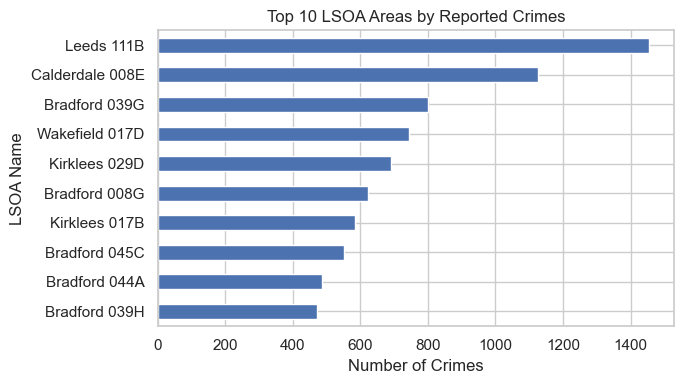

In [131]:
# Plot top 5 LSOAs crime locations by crime count

import matplotlib.pyplot as plt

top_lsoas = crime_data_cleaned['LSOA name'].value_counts().head(10)

top_lsoas.plot(kind='barh', figsize=(7, 4), title='Top 10 LSOA Areas by Reported Crimes')
plt.xlabel('Number of Crimes')
plt.ylabel('LSOA Name')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [41]:
# Investigate Crimes without Crime ID 

missing_id_counts = (
    crime_data_cleaned[crime_data_cleaned['Crime ID'].isna()]
    ['Crime type']
    .value_counts()
)
print("\nCrimes lacking a Crime ID (top 10):")
print(missing_id_counts.head(10))


Crimes lacking a Crime ID (top 10):
Crime type
Anti-Social Behaviour    20962
Name: count, dtype: int64


In [43]:
# Quick Final Missing-Data Check

print("\nRemaining missing-value percentages:")
print((crime_data_cleaned.isnull().mean() * 100).round(2).sort_values(ascending=False))


Remaining missing-value percentages:
Crime ID                 14.44
Month                     0.00
Longitude                 0.00
Latitude                  0.00
Location                  0.00
LSOA code                 0.00
LSOA name                 0.00
Crime type                0.00
Last outcome category     0.00
dtype: float64


In [45]:
# Reset DataFrame Index 

crime_data_cleaned.reset_index(drop=True, inplace=True)
print("Final dataset rows after all cleaning steps:", len(crime_data_cleaned))

Final dataset rows after all cleaning steps: 145148


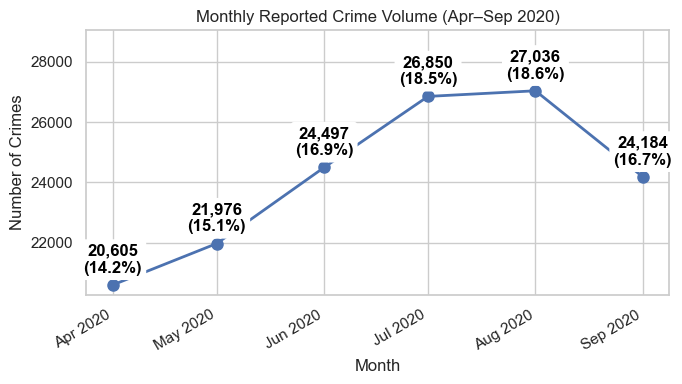

In [180]:
import seaborn as sns
import matplotlib.dates as mdates

# Optional: ensure visuals are clean and readable
sns.set(style="whitegrid")

# Examine Monthly Crime Patterns
# Plot: Total crimes per month

# General code for scalability and maximum flexibility
crime_data_cleaned['Month'] = pd.to_datetime(crime_data_cleaned['Month'])

# Group by Month and count
monthly_counts = crime_data_cleaned.groupby('Month').size()

plt.figure(figsize=(7, 4))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', markersize=8, linewidth=2)

total = monthly_counts.sum()
for x, y in zip(monthly_counts.index, monthly_counts.values):
    pct = 100 * y / total
    plt.text(
        x, y+300, f"{y:,}\n({pct:.1f}%)",  # add \n for vertical stacking
        ha='center', va='bottom', fontsize=12, fontweight='bold',
        color='black',
        bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.25')
    )

plt.ylim(top=monthly_counts.max() + 2000)
plt.title("Monthly Reported Crime Volume (Apr–Sep 2020)")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()


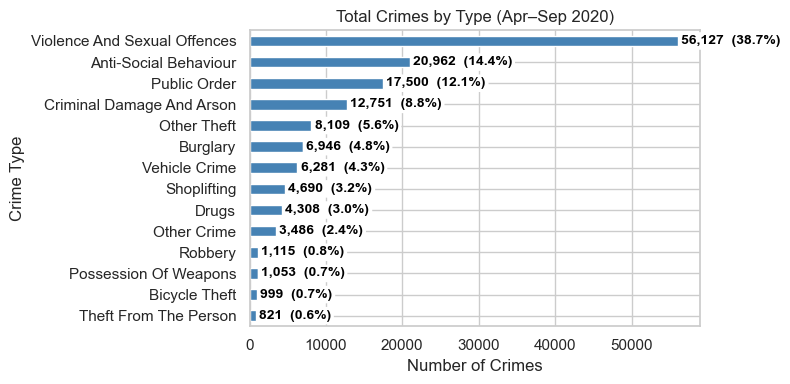

In [139]:
import matplotlib.pyplot as plt

crime_counts = df['Crime type'].value_counts()

plt.figure(figsize=(8, 4))
sorted_counts = crime_counts.sort_values()
total = sorted_counts.sum()

ax = sorted_counts.plot(kind='barh', color='steelblue')
plt.title("Total Crimes by Type (Apr–Sep 2020)")
plt.xlabel("Number of Crimes")
plt.ylabel("Crime Type")

# Add value and percent labels with white background box
for i, v in enumerate(sorted_counts):
    pct = 100 * v / total
    ax.text(
        v + 400, i, f"{v:,}  ({pct:.1f}%)",
        va='center', fontsize=10, fontweight='bold', color='black',
        bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2')
    )

plt.tight_layout()
plt.show()


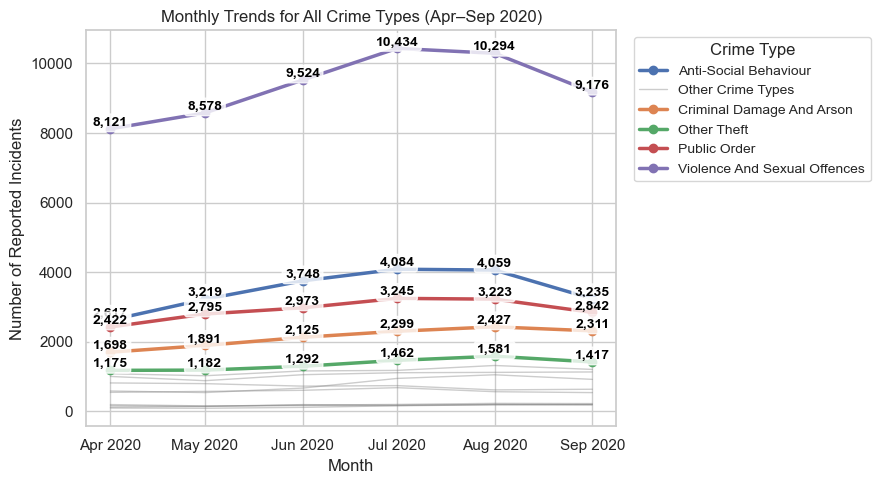

In [145]:
# Get top 5 crime types by total count
top_types = crime_data_cleaned['Crime type'].value_counts().head(5).index.tolist()

# Pivot table: count of each crime type per month
monthly_type_counts = (
    crime_data_cleaned
    .groupby(['Month', 'Crime type'])
    .size()
    .unstack(fill_value=0)
)

plt.figure(figsize=(9, 5))
other_line_plotted = False  # flag to add 'Other Crime Types' to legend only once
for col in monthly_type_counts.columns:
    ydata = monthly_type_counts[col]
    if col in top_types:
        plt.plot(
            monthly_type_counts.index, ydata,
            marker='o', label=col, linewidth=2.5
        )
        # Value label at each month
        for x, y in zip(monthly_type_counts.index, ydata):
            plt.text(
                x, y, f"{y:,}",
                color='black', fontsize=10, fontweight='bold',
                va='bottom', ha='center',
                bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.2')
            )
    else:
        if not other_line_plotted:
            plt.plot(
                monthly_type_counts.index, ydata,
                color='gray', alpha=0.4, linewidth=1,
                label='Other Crime Types'  # Only label the first time
            )
            other_line_plotted = True
        else:
            plt.plot(
                monthly_type_counts.index, ydata,
                color='gray', alpha=0.4, linewidth=1
            )
plt.title("Monthly Trends for All Crime Types (Apr–Sep 2020)")
plt.xlabel("Month")
plt.ylabel("Number of Reported Incidents")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title='Crime Type', fontsize='small')
plt.tight_layout()
plt.show()


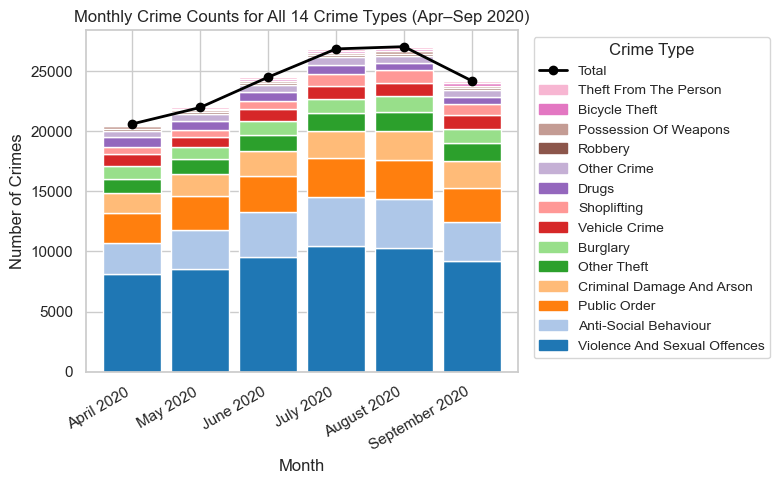

In [151]:
import numpy as np
import matplotlib.patches as mpatches

# Create a pivot table with crime counts per month per crime type
monthly_type_all = (
    crime_data_cleaned
    .groupby(['Month', 'Crime type'])
    .size()
    .unstack(fill_value=0)
)

# Ensure months are sorted chronologically (just in case)
monthly_type_all = monthly_type_all.sort_index()

# Sort columns so the most frequent is leftmost (bottom of bar)
crime_order = monthly_type_all.sum().sort_values(ascending=False).index
monthly_type_all = monthly_type_all[crime_order]
# Choose a clear palette
colors = sns.color_palette("tab20", len(monthly_type_all.columns))
# Compute monthly totals
totals = monthly_type_all.sum(axis=1)
fig, ax = plt.subplots(figsize=(8, 5))
# Plot stacked bar
bars = monthly_type_all.plot(
    kind='bar',
    stacked=True,
    color=colors,
    width=0.85,
    ax=ax
)
# Overlay total line, aligned with bars
bar_positions = np.arange(len(monthly_type_all.index))
ax.plot(
    bar_positions, totals.values,
    color='black', marker='o', linewidth=2, label='Total'
)
# Format x-ticks
ax.set_xticks(bar_positions)
ax.set_xticklabels(
    [d.strftime('%B %Y') for d in monthly_type_all.index],
    rotation=30, ha='right'
)
ax.set_title("Monthly Crime Counts for All 14 Crime Types (Apr–Sep 2020)")
ax.set_xlabel("Month")
ax.set_ylabel("Number of Crimes")
# Build custom legend in stacking order (bottom stack at bottom of legend)
legend_handles = [
    mpatches.Patch(color=colors[i], label=label)
    for i, label in enumerate(monthly_type_all.columns)
]
# Add the total line at the end
legend_handles = legend_handles + [plt.Line2D([0], [0], color='black', marker='o', linewidth=2, label='Total')]
# Reverse the handles so the bottom stack is at the bottom of the legend
ax.legend(
    handles=legend_handles[::-1],
    bbox_to_anchor=(1.02, 1), loc='upper left',
    title='Crime Type', fontsize='small'
)
plt.tight_layout()
plt.show()


In [87]:
# Group data by Month and Crime type
monthly_type_counts = (
    crime_data_cleaned.groupby(['Month', 'Crime type']).size()
    .unstack(fill_value=0)
    .sort_index()
)
# Focus on August and September 2020
august = monthly_type_counts.loc[monthly_type_counts.index == pd.Timestamp('2020-08-01')]
september = monthly_type_counts.loc[monthly_type_counts.index == pd.Timestamp('2020-09-01')]
# Calculate the difference (Sept - Aug) for each crime type
diff = (september.values - august.values).flatten()
change_df = pd.DataFrame({
    'Crime Type': monthly_type_counts.columns,
    'August': august.values.flatten(),
    'September': september.values.flatten(),
    'Change': diff
})
# Sort by absolute size of the drop
change_df = change_df.sort_values('Change')
# Display the table (as normal DataFrame)
print(change_df)


                      Crime Type  August  September  Change
13  Violence And Sexual Offences   10294       9176   -1118
0          Anti-Social Behaviour    4059       3235    -824
8                   Public Order    3223       2842    -381
6                    Other Theft    1581       1417    -164
10                   Shoplifting    1048        916    -132
3      Criminal Damage And Arson    2427       2311    -116
2                       Burglary    1315       1202    -113
5                    Other Crime     561        535     -26
7          Possession Of Weapons     198        184     -14
9                        Robbery     226        220      -6
1                  Bicycle Theft     190        191       1
11         Theft From The Person     184        194      10
12                 Vehicle Crime    1117       1129      12
4                          Drugs     613        632      19


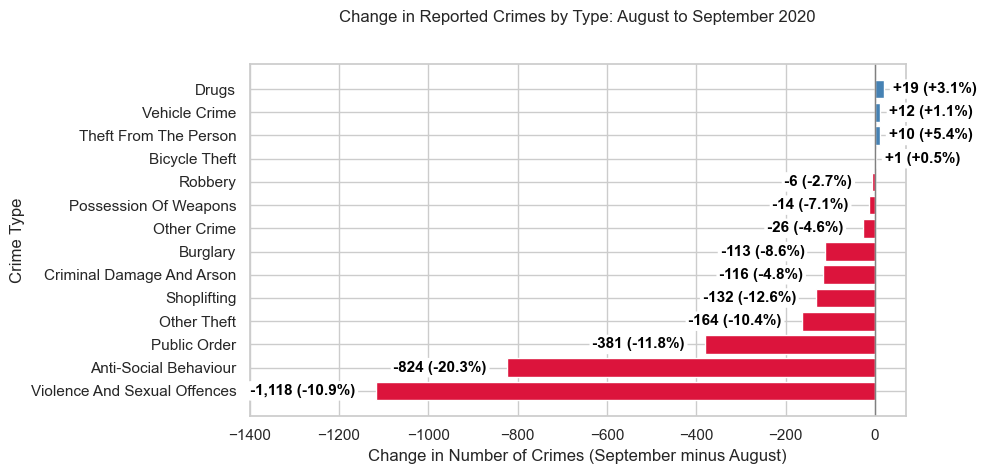

In [119]:
# Calculate % change relative to August for each crime type
change_df['% Change'] = 100 * change_df['Change'] / change_df['August']
# Sort by absolute change for best visual
change_df_sorted = change_df.sort_values('Change')
plt.figure(figsize=(10, 5))
bars = plt.barh(
    change_df_sorted['Crime Type'],
    change_df_sorted['Change'],
    color=['crimson' if v < 0 else 'steelblue' for v in change_df_sorted['Change']]
)
plt.title("Change in Reported Crimes by Type: August to September 2020", pad=30)
plt.xlabel("Change in Number of Crimes (September minus August)")
plt.ylabel("Crime Type")
# Add value and percent labels, bold on white, no overlap with title
for i, (v, pct) in enumerate(zip(change_df_sorted['Change'], change_df_sorted['% Change'])):
    label = f"{v:+,} ({pct:+.1f}%)"
    x_text = v - 45 if v < 0 else v + 20
    ha = 'right' if v < 0 else 'left'
    plt.text(
        x_text, i, label,
        va='center', ha=ha,
        fontsize=11, fontweight='bold', color='black',
        bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.18')
    )
plt.axvline(0, color='grey', linewidth=1)
plt.xlim(-1400, change_df_sorted['Change'].max() + 50)   # << Extra space on the left!
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()


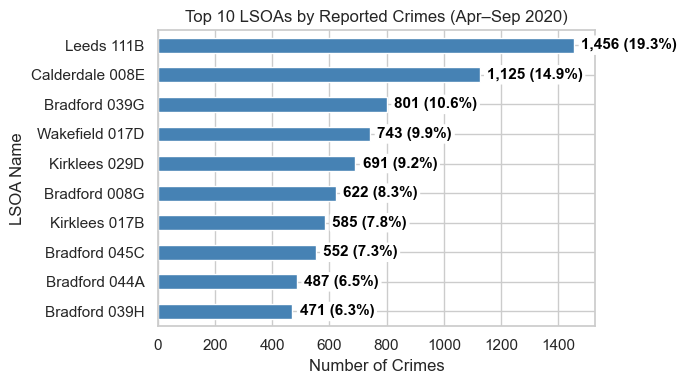

In [153]:
# Get top 10 LSOAs by reported crimes
top_lsoas = crime_data_cleaned['LSOA name'].value_counts().head(10)

# Calculate total of top 10 for percentage calculation
total_top10 = top_lsoas.sum()

# Create the plot
plt.figure(figsize=(7, 4))
ax = top_lsoas.plot(kind='barh', color='steelblue')

# Set plot titles and labels
plt.title("Top 10 LSOAs by Reported Crimes (Apr–Sep 2020)")
plt.xlabel("Number of Crimes")
plt.ylabel("LSOA Name")

# Invert y-axis so the highest is on top
plt.gca().invert_yaxis()

# Annotate each bar with value and percentage
for i, v in enumerate(top_lsoas):
    pct = 100 * v / total_top10
    ax.text(
        v + 25, i, f"{v:,} ({pct:.1f}%)",
        va='center', fontsize=11, fontweight='bold', color='black',
        bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.18')
    )

# Improve layout
plt.tight_layout()
plt.show()


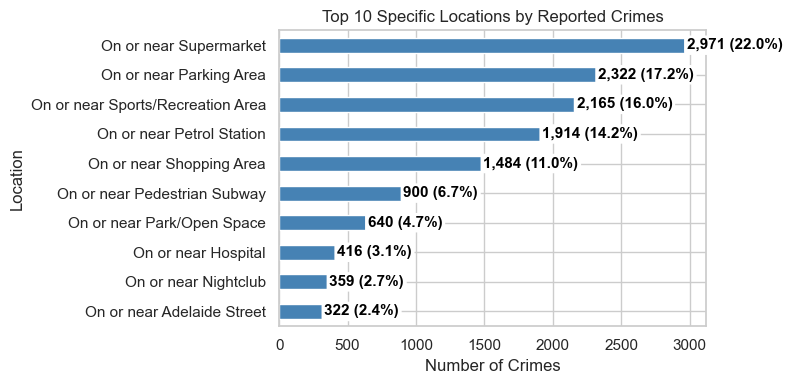

In [157]:
# Filter out 'No Location' rows before analyzing top locations
location_data = crime_data_cleaned[crime_data_cleaned['Location'] != 'No Location']
frequent_locations = location_data['Location'].value_counts().head(10)
plt.figure(figsize=(8,4))
ax = frequent_locations.plot(kind='barh', color='steelblue')
plt.title("Top 10 Specific Locations by Reported Crimes")
plt.xlabel("Number of Crimes")
plt.ylabel("Location")
plt.gca().invert_yaxis()
# Total for percent calculation (top 10 only)
total_top10 = frequent_locations.sum()
# Add bold, white-boxed count and percent labels
for i, v in enumerate(frequent_locations):
    pct = 100 * v / total_top10
    ax.text(
        v + 8, i, f"{v:,} ({pct:.1f}%)",
        va='center', fontsize=11, fontweight='bold', color='black',
        bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.18')
    )
plt.tight_layout()
plt.show()


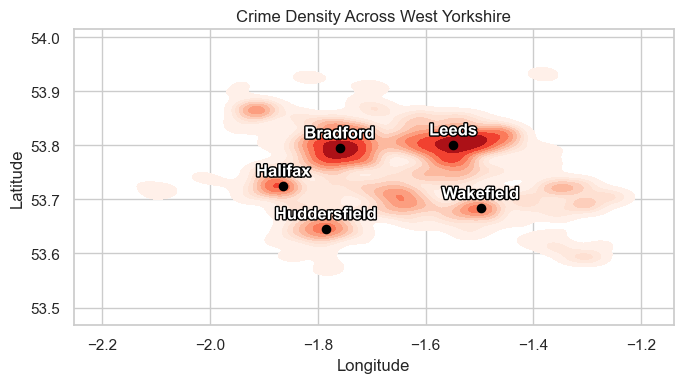

In [182]:
import matplotlib.patheffects as pe  # <-- Import path effects

# Filter for spatial analysis: Remove 'No Location'
spatial_data = crime_data_cleaned[crime_data_cleaned['Location'] != 'No Location']
# City center coordinates for West Yorkshire (Leeds, Bradford, etc.)
city_coords = {
    "Leeds": (-1.5491, 53.8008),
    "Bradford": (-1.7594, 53.7950),
    "Wakefield": (-1.4977, 53.6833),
    "Huddersfield": (-1.7850, 53.6458),
    "Halifax": (-1.8636, 53.7250)
}
plt.figure(figsize=(7, 4))
sns.kdeplot(
    data=spatial_data,
    x="Longitude", y="Latitude",
    fill=True, cmap="Reds", thresh=0.05
)
plt.title("Crime Density Across West Yorkshire")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
# Overlay city names and markers for centers
for city, (lon, lat) in city_coords.items():
    plt.scatter(lon, lat, color='black', s=35, zorder=5)
    plt.text(
        lon, lat + 0.012, city,
        fontsize=12, color='white', weight='bold', ha='center', va='bottom',
        path_effects=[pe.withStroke(linewidth=2, foreground="black")]
    )
plt.tight_layout()
plt.show()
